En Machine Learning, la mayoría de los modelos tienen hiperparámetros que deben ajustarse para conseguir mejores predicciones. 

Por ejemplo, en el modelo de **Elastic Net**, teníamos la siguiente función de error:

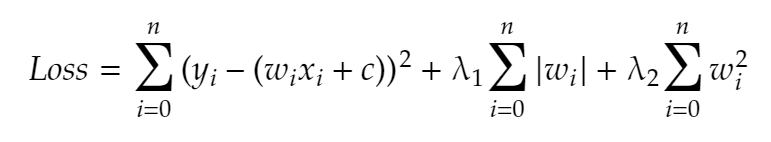

donde hay dos parámetros $\lambda_1$ y $\lambda_2$ que debemos optimizar para que el modelo ofrezca los mejores resultados posibles.

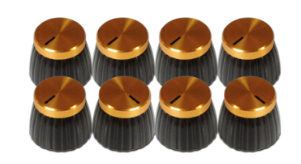


¿Por qué se llaman hiperparámetros y no parámetros? La diferencia es que los hiperparámetros hay que fijarlos antes de entrenar, mientras que los parámetros son aquellos que se ajustan en el entrenamiento. En el caso de Elastic Net, los hiperparámetros serían $\lambda_1$ y $\lambda_2$ mientras que los parámetros serían $w_0$, $w_1$, $w_2$... 

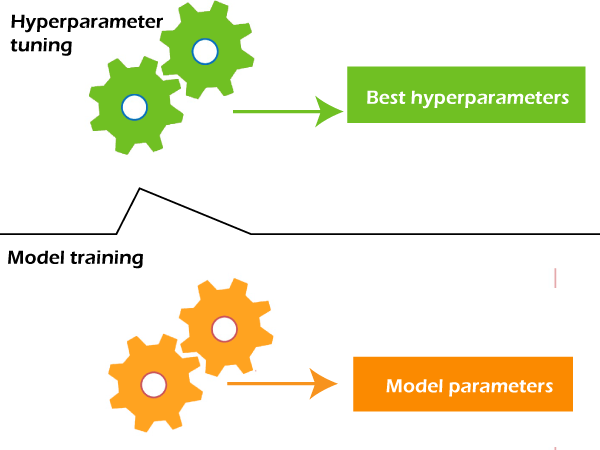

Los dos métodos más utilizados para optimizar hiperparámetros son **Random Search** y **Grid Search**. Ambas técnicas se aplican con el método de **Cross Validation**. 

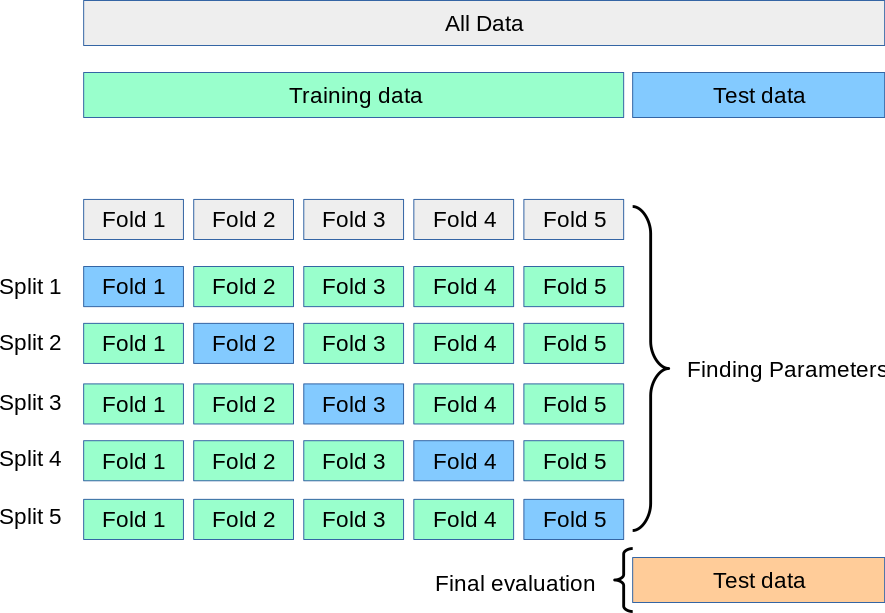

## Random Search
Como su propio nombre indica, utiliza combinaciones aleatorias de los hiperparámetros. Esto implica que no se van a probar todos los posibles valores, sino algunos muestreados de forma aleatoria. En primer lugar, se divide el dominio de hiperparámetros en un grid. Después, se seleccionan combinaciones aleatorias hasta llegar a un número máximo de iteraciones, quedándose con la mejor combinación de todas las evaluadas. 

Esta opción es recomendable cuando tenemos muchos hiperparámetros con muchos posibles valores 
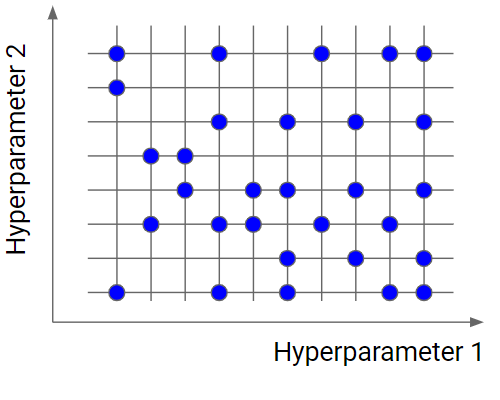

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import ElasticNet
import numpy as np

In [2]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

In [3]:
param_grid = {
    'alpha': [1e-10, 1e-4, 1e-2, 1, 5, 10, 20, 40],
    'l1_ratio': np.arange(0,1,0.01)
}
# ¿Cuántas combinaciones posibles de parámetros tenemos?

In [8]:
param_grid

{'alpha': [1e-10, 0.0001, 0.01, 1, 5, 10, 20, 40],
 'l1_ratio': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99])}

In [7]:
len(param_grid["alpha"])*len(param_grid["l1_ratio"])

800

In [9]:
elastic = ElasticNet()

random_search = RandomizedSearchCV(elastic, # El modelo que quiero entrenar
                                   param_grid, # El grid de parámetros
                                   random_state=1, # Semilla
                                   n_iter=100, # Nº de iteraciones del random search
                                   cv=5, # Folds del cross validation
                                   scoring="r2", # Métrica que quiero optimizar
                                   n_jobs = -1 # Paralelizar
                                  )

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=ElasticNet(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [1e-10, 0.0001, 0.01, 1, 5, 10,
                                                  20, 40],
                                        'l1_ratio': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
                   random_state=1, scoring='r2')

In [10]:
# Mejores parámetros del modelo
random_search.best_params_

{'l1_ratio': 0.01, 'alpha': 0.0001}

In [94]:
# Mejor score (R2)
random_search.best_score_

0.45433194994112

In [24]:
# random_search.best_estimator_ contiene el mejor modelo
X_train.shape

(353, 10)

In [21]:
random_search.best_estimator_.coef_

array([  41.95188923, -227.26043042,  536.22030113,  333.70496   ,
       -208.95856276,  -32.17178006, -156.20483528,  169.91693151,
        448.88133911,   64.35253694])

In [27]:
random_search.best_estimator_.score(X_test, y_test)

0.45811580159405374

In [28]:
# Es equivalente a hacer esto:

model = ElasticNet(alpha=0.0001, l1_ratio=0.01)
model.fit(X_train, y_train)
# Qué es el score?
model.score(X_test, y_test)


0.45811580159405374

In [29]:
# Compruebo que los coeficientes coinciden con el best_estimator_
model.coef_

array([  41.95188923, -227.26043042,  536.22030113,  333.70496   ,
       -208.95856276,  -32.17178006, -156.20483528,  169.91693151,
        448.88133911,   64.35253694])

¿Funciona mejor que una regresión lineal sin regularización?

In [34]:
from sklearn.linear_model import LinearRegression

diabetes_model = LinearRegression()
diabetes_model.fit(X_train, y_train)
diabetes_model.score(X_test,y_test)


0.45260276297191926

In [35]:
diabetes_model.score(X_train,y_train)

0.5279193863361498

In [51]:
# calcular RMSE
residuos = y_test - diabetes_model.predict(X_test)
residuos = residuos**2
rmse = residuos.mean()**(1/2)
rmse

53.85344583676594

In [53]:
# calcular MAE
mae = abs(y_test - diabetes_model.predict(X_test)).mean()
mae

42.794094679599944

In [66]:
errors = [-5, 5]
mae = (5+5)/2

In [62]:
mae

5.0

In [83]:
rmse = ((5**2+5**2)/2)**(1/2)

In [84]:
rmse 

5.0

In [23]:
# Existe overfitting?


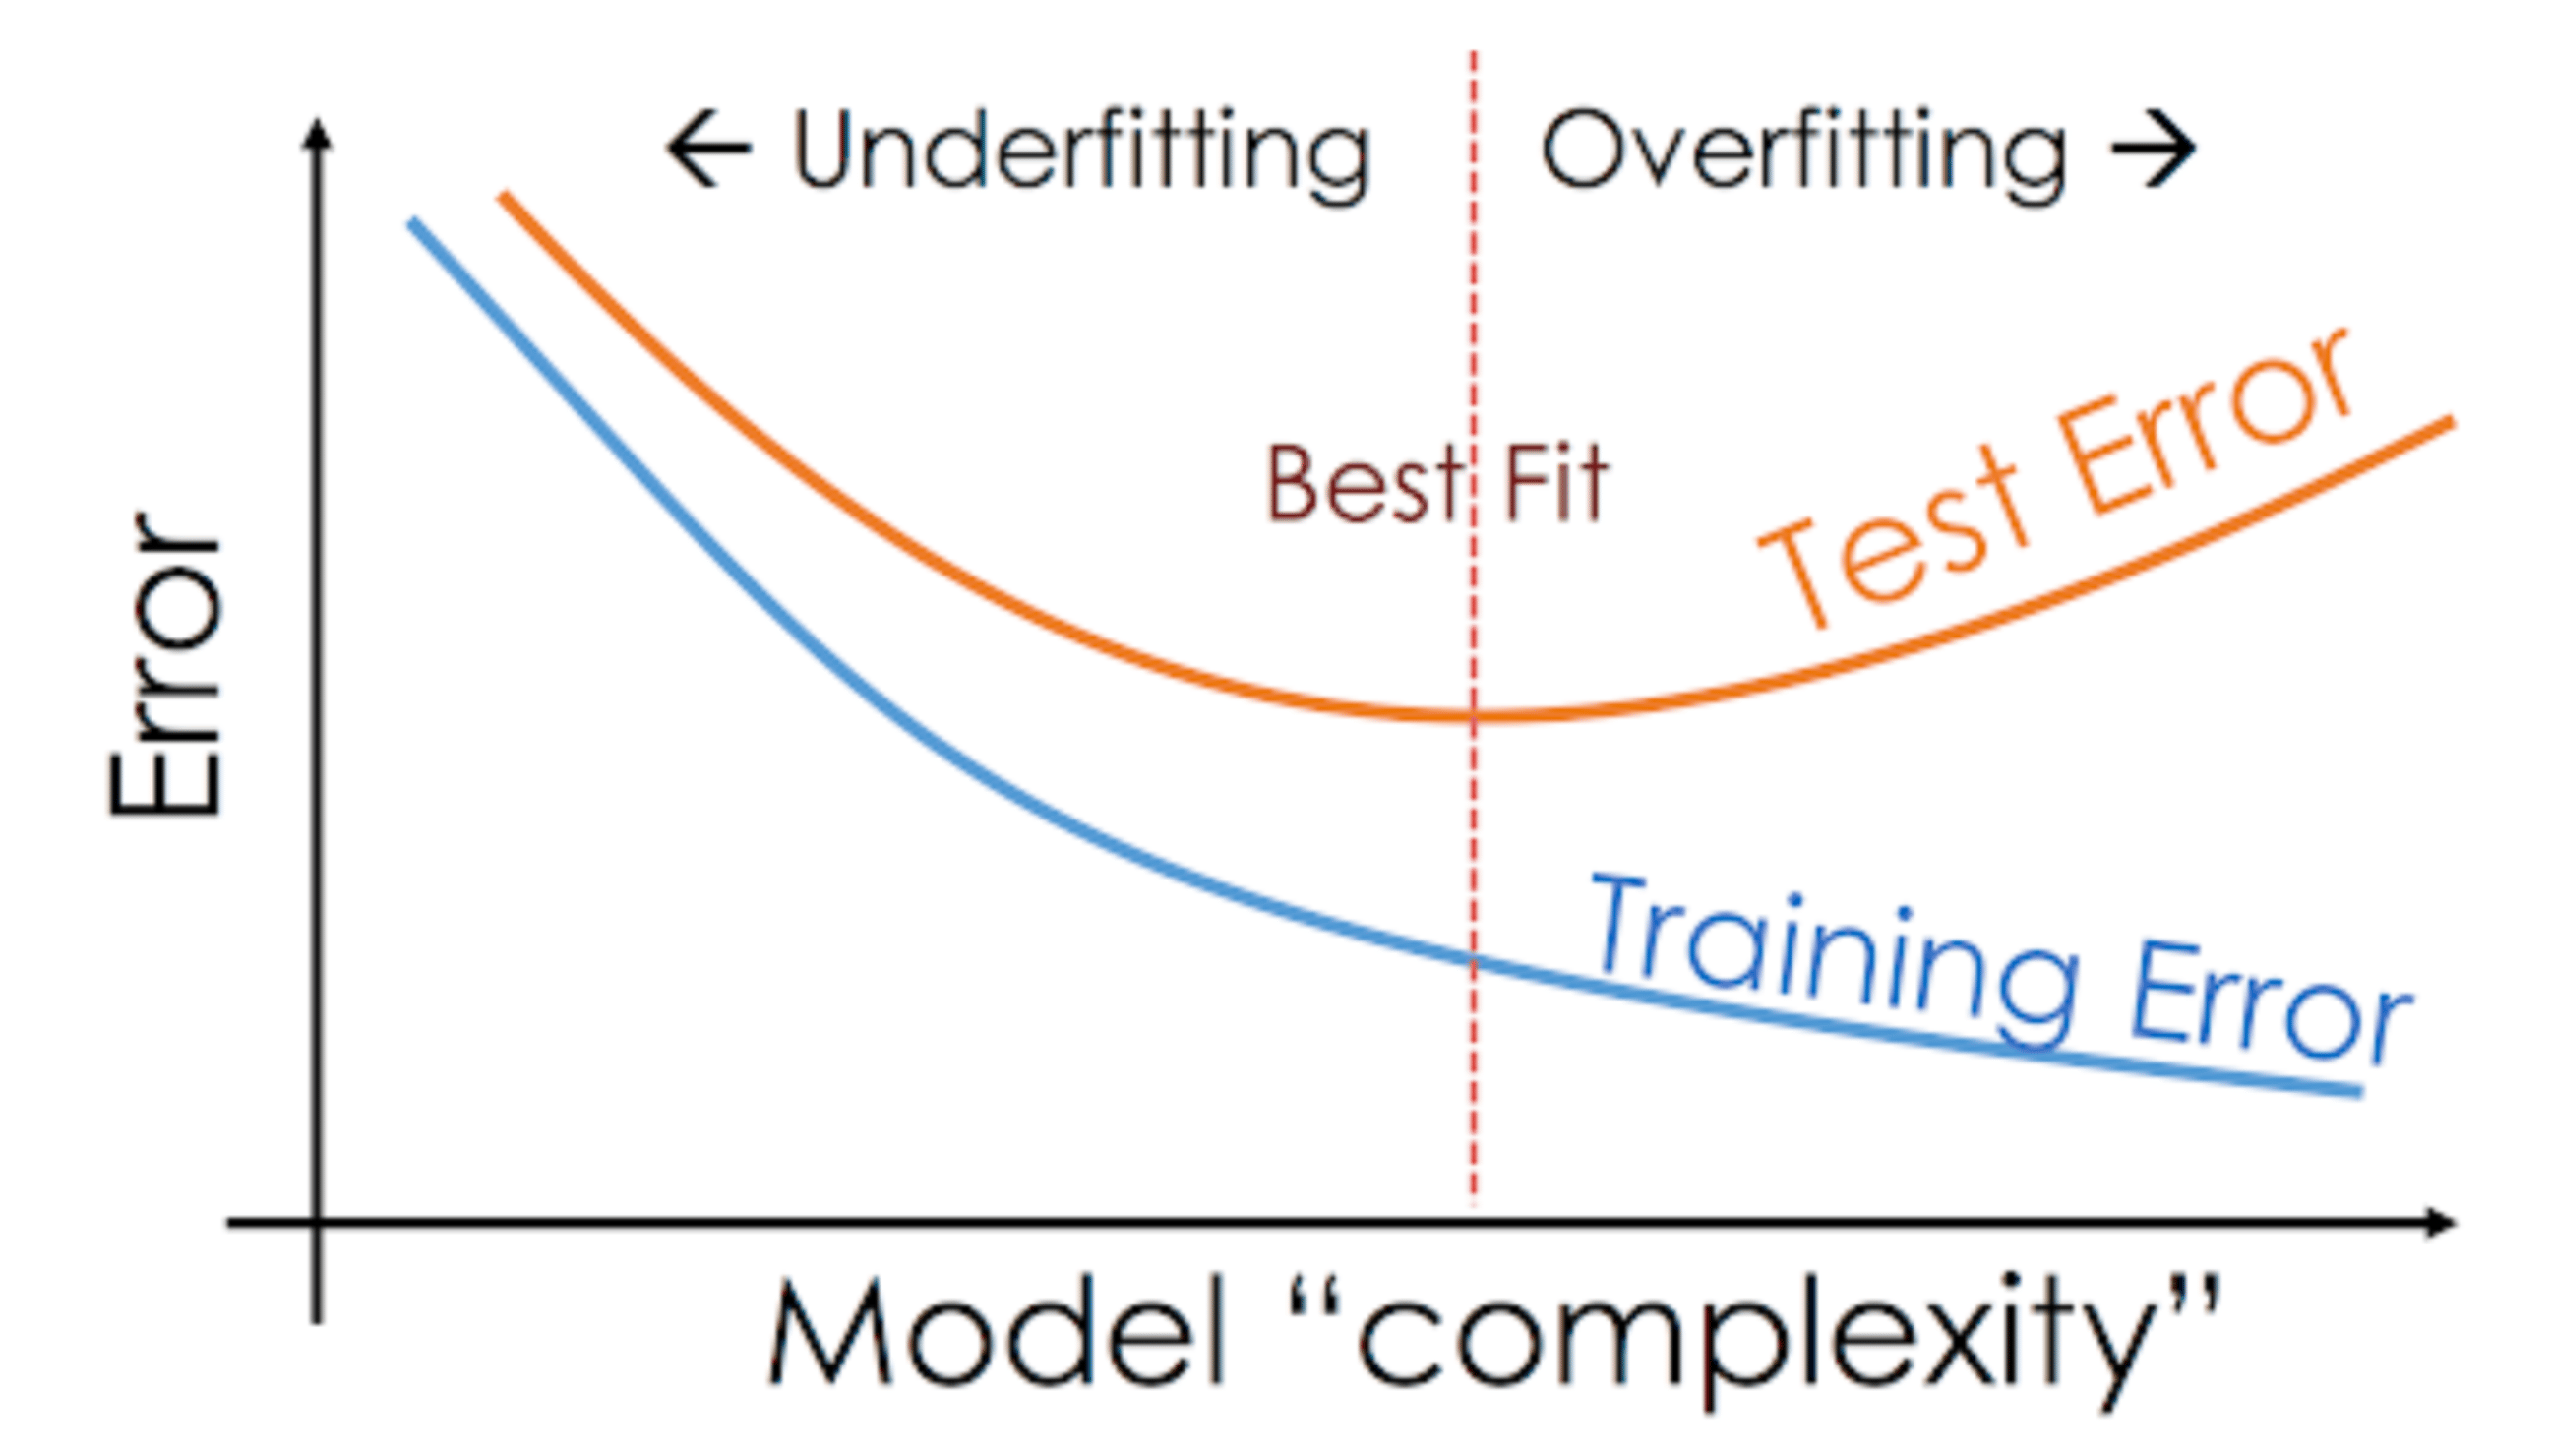

![Sin título.png](<attachment:Sin título.png>)

## Grid Search
Este método prueba todas las combinaciones del grid y evalúa el modelo para cada combinación, también usando cross-validation para cada una. 
Es más lento que Random Search, ya que prueba todas las posibles combinaciones. La ventaja es que te aseguras haber encontrado la mejor de todas al finalizar el proceso, lo que no te garantizaba Random Search. 

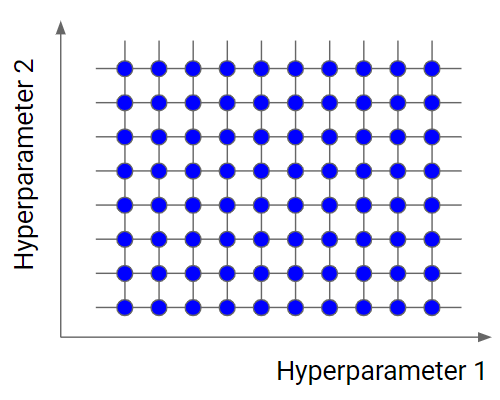

In [102]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [1e-10, 1e-4, 1e-2, 1, 5, 10, 20, 40],
    'l1_ratio': np.arange(0, 1, 0.01)
}

elastic = ElasticNet()

grid_search = GridSearchCV(elastic,
                           param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1,
                           return_train_score = True,
                           verbose=True
                          )

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1e-10, 0.0001, 0.01, 1, 5, 10, 20, 40],
                         'l1_ratio': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             return_train_score=True, scoring='r2', verbose=True)

In [98]:
grid_search.best_params_

{'alpha': 0.01, 'l1_ratio': 0.97}

In [99]:
grid_search.best_score_

0.45636646520739765

In [100]:
random_search.best_score_

0.45433194994112

In [95]:
# R2 en test
grid_search.best_estimator_.score(X_test, y_test)

0.46261528610078473

In [108]:
# R2 en test
grid_search.best_estimator_.score(X_train, y_train)

0.519618926774386

In [ ]:
# calcular RMSE


In [ ]:
# calcular MAE

In [ ]:
# Existe overfitting?

In [ ]:
# Replicamos el gráfico de abajo? 
# Sí, requiere un bucle for anidado (hoy jugamos a ser Dios)

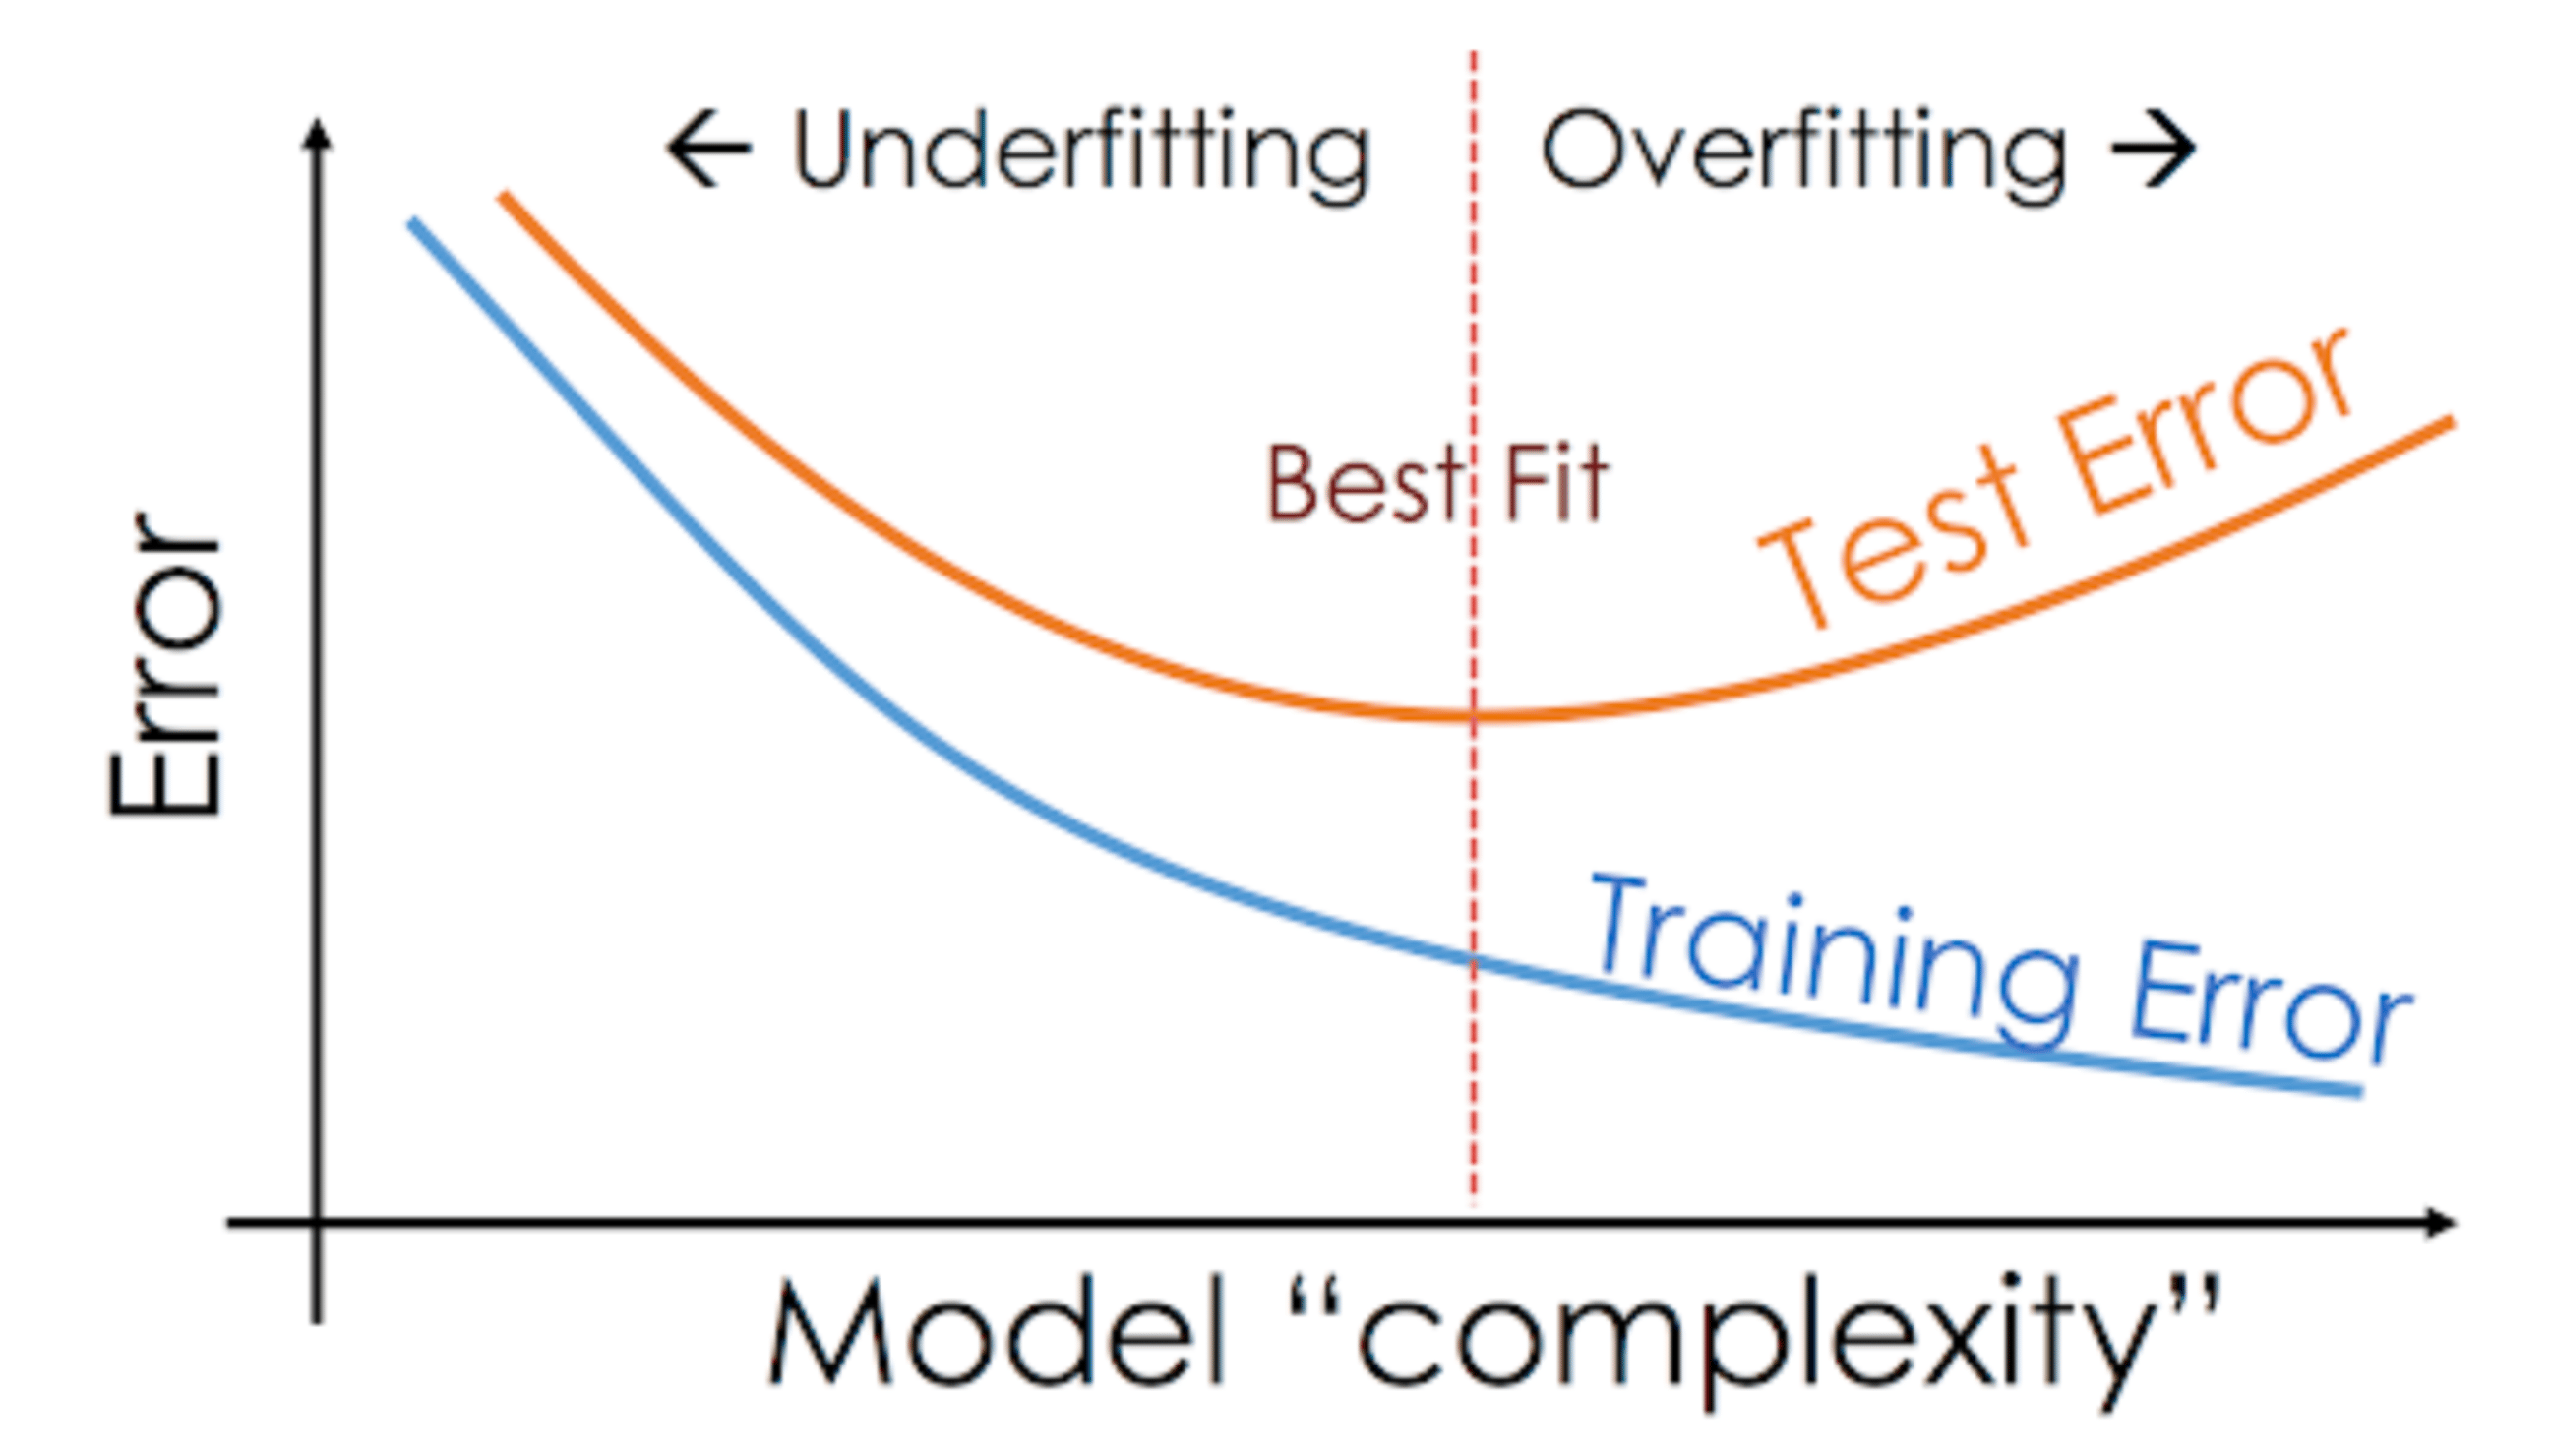

Hemos obtenido el mejor resultado con Grid Search, ya que ha evaluado todas las posibles combinaciones, quedándose con la mejor.

## Bayesian Search
Existe un tercer método para ajustar los hiperparámetros del modelo: la optimización bayesiana, que utiliza métodos probabilísticos para elegir y probar la siguiente combinación de hiperparámetros. Con esta estrategia, se consigue que la búsqueda se vaya redirigiendo en cada iteración hacia las regiones de mayor interés. 

El objetivo final es reducir el número de combinaciones de hiperparámetros con las que se evalúa el modelo, eligiendo únicamente los mejores candidatos. La ventaja frente a las otras estrategias mencionadas es el ahorro de tiempo cuando el espacio de búsqueda es muy amplio o la evaluación del modelo es muy lenta.

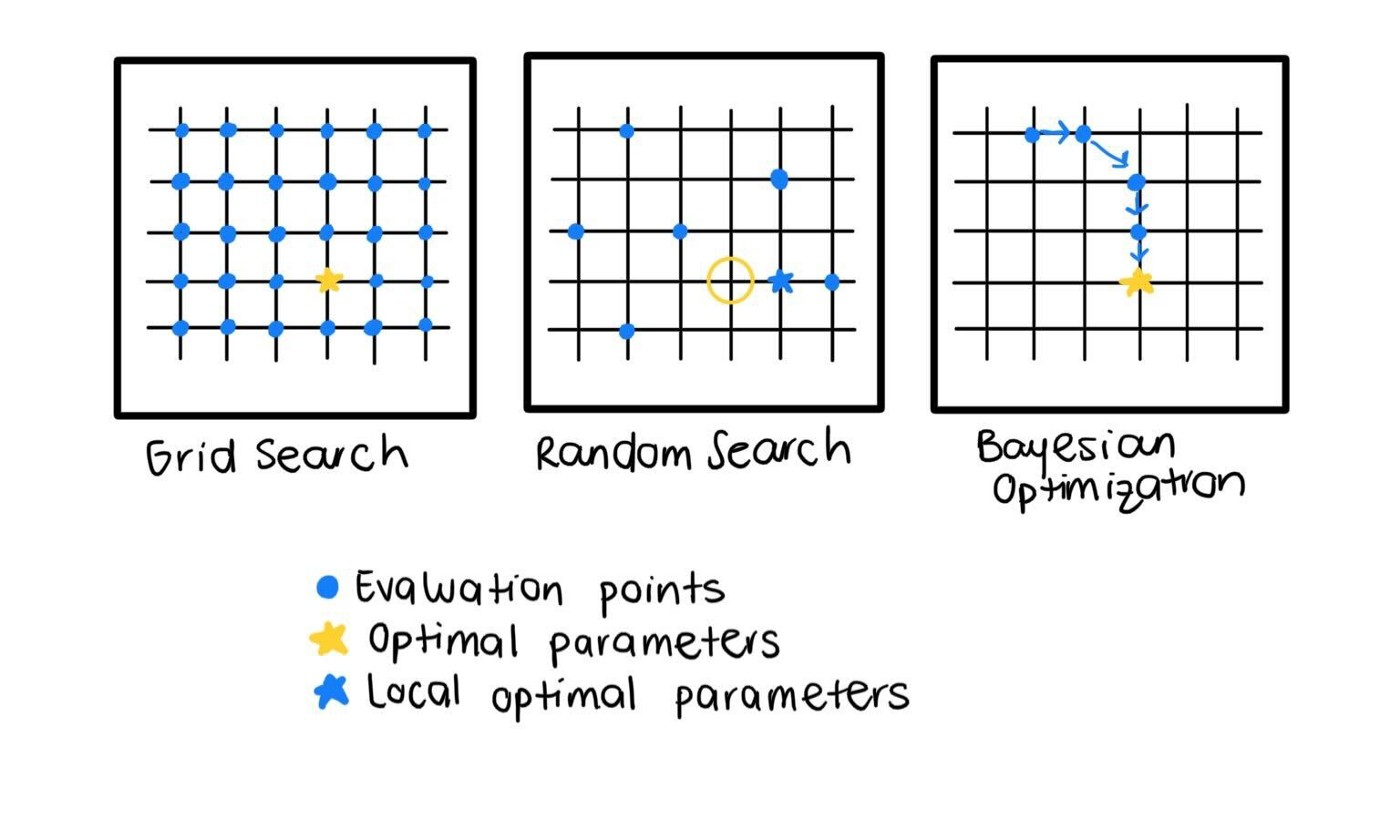

La librería Hyperopt nos permite aplicar la optimización bayesiana

In [25]:
!pip install hyperopt

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.6 MB 3.3 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.6 MB 5.1 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.6 MB 5.0 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.6 MB 6.3 MB/s eta 0:00:01
   ------------------------------- -------- 1.2/1.6 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------  1.6/1.6 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/200.5 kB ? eta -:--:--
   ---------------------------------------- 200.5/200.5 kB 6.1 MB/s eta 0:00:00


In [26]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score

In [27]:
def hyperopt_train_test(params):
    model = ElasticNet(**params)
    return cross_val_score(model, X_train, y_train, 
                           cv=5, scoring='r2').mean()

space = {
    'alpha': hp.uniform('alpha', 0.0001, 1.0),
    'l1_ratio': hp.uniform('l1_ratio', 0.0001, 1.0)
}

def f(params):
    r2 = hyperopt_train_test(params)
    return {'loss':-r2, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=100, trials=trials)

100%|██████████| 100/100 [00:00<00:00, 179.25trial/s, best loss: -0.45647238688536296]


In [28]:
best

{'alpha': 0.0017920117777245892, 'l1_ratio': 0.8081953026561871}

In [29]:
model_bayes = ElasticNet(alpha=best['alpha'], l1_ratio=best['l1_ratio'])
model_bayes.fit(X_train, y_train)
model_bayes.score(X_test, y_test)

0.4614725571906573

In [ ]:
# Calcular RMSE

In [ ]:
# Calcular MAE

In [30]:
# Overfit?

Más información sobre los espacios de búsqueda de hyperopt: http://hyperopt.github.io/hyperopt/getting-started/search_spaces/